# 🍎🍊 Apple vs Orange Classifier: Deep Learning for Image Recognition

## 📌 Overview  
This project builds a robust **image classification model** to distinguish between **apples** and **oranges** using a Convolutional Neural Network (CNN). The dataset contains 800 labeled images (400 per class), making it ideal for demonstrating end-to-end deep learning workflows. This portfolio highlights essential computer vision steps: image preprocessing, model training, evaluation, and visualization.

---

## 🧪 Exploratory Data Analysis (EDA)

We begin by exploring the image dataset and visual structure of the classes:

### 🖼️ Sample Image Visualization
- Display sample images from each class to understand data quality.
- Explore variations in shape, color, and lighting.

### 📊 Class Distribution
- 400 images of apples and 400 of oranges → perfectly balanced.
- Visualization of dataset size per class for sanity check.

### 🔧 Image Dimension Inspection
- Confirm uniformity or variation in image sizes.
- Resize all images (e.g., to 128×128) for input to CNN.

---

## 🧠 Model Development

### ⚙️ Preprocessing & Data Augmentation
- Resize → Normalize pixel values
- Augmentation (e.g., random rotation, horizontal flip) to improve generalization
- Dataset splitting: 70% training, 30% validation

### 🧱 CNN Architecture
- **Custom CNN**: 2–3 convolutional layers + pooling + fully connected layers
- Or use **Transfer Learning**: Pretrained ResNet18 fine-tuned on apple/orange dataset

### 📉 Loss & Optimizer
- **Loss Function**: CrossEntropyLoss  
- **Optimizer**: Adam  
- **Metric**: Accuracy

---

## 🧪 Training & Evaluation

### 📈 Performance Metrics
- Accuracy per epoch (training vs. validation)
- Confusion matrix: visualizing classification performance
- Precision, Recall, F1-score

### 🖼️ Predicted Images Showcase
- Display a few test images with predicted and true labels.
- Identify common misclassification cases.

---

## 🔄 Model Deployment (Optional)

- Save model as `.pt` or `.pth` file
- Build a **Gradio or Streamlit app** to upload and classify a new fruit image in real time
- Demo-ready app for recruiters and portfolio showcases

---

## 🔍 Key Insights

- ✅ The model successfully learns to differentiate based on **color, texture, and shape**.
- ⚠️ Misclassifications often occur when images have low lighting or partial occlusion.
- 🔁 Simple CNNs can perform surprisingly well with balanced and clean datasets.
- 🚀 Data augmentation boosts performance by preventing overfitting.

---

## 🛠️ Tools & Technologies Used

- **Programming Language**: Python 🐍  
- **Framework**: PyTorch + torchvision  
- **Visualization**: Matplotlib, Seaborn  
- **Modeling Techniques**:  
  - Convolutional Neural Networks (CNN)  
  - Transfer Learning (optional)  
  - Image augmentation  
  - Evaluation metrics (accuracy, confusion matrix, F1)  
- **Deployment**: Gradio / Streamlit (optional)

---

## 📎 Dataset Information

- **Source**: 800 labeled images in two folders (Apple and Orange)  
- **Structure**:  
├── dataset/ ├── apple/ ├── orange/

- **Format**: JPG/PNG images  
- **Use Case**: Binary classification (apple vs orange)  
- **Compatibility**: Works directly with `torchvision.datasets.ImageFolder`

---

## 👩‍💻 Author

- **Hilda Adina Rahmi**  
Aspiring Data Scientist passionate about computer vision, deep learning, and building intelligent systems that understand images like humans do.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Apple Images:


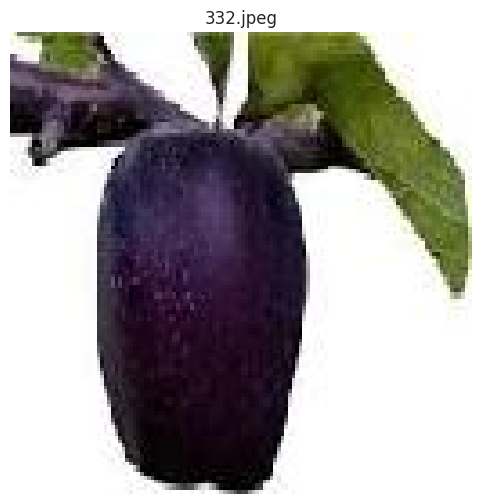

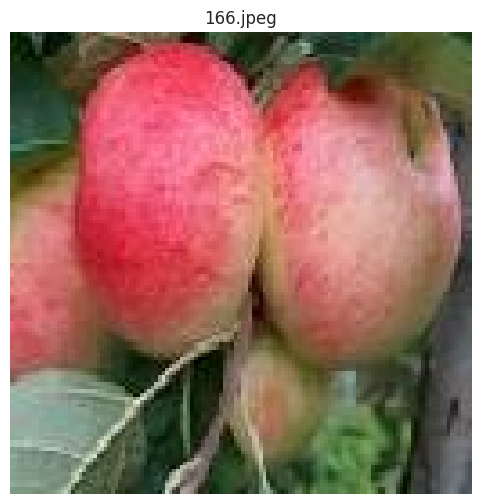

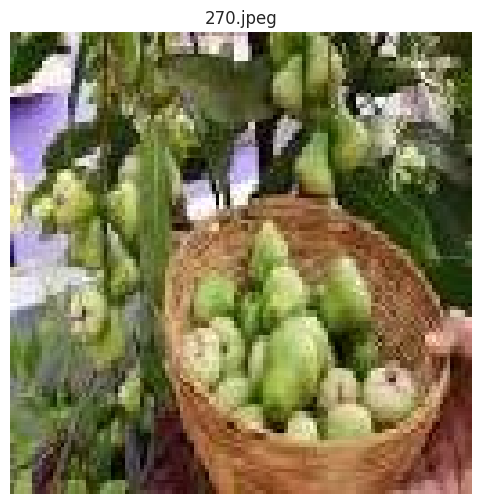

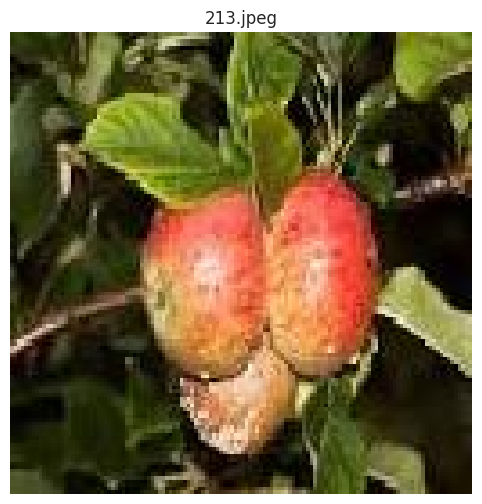

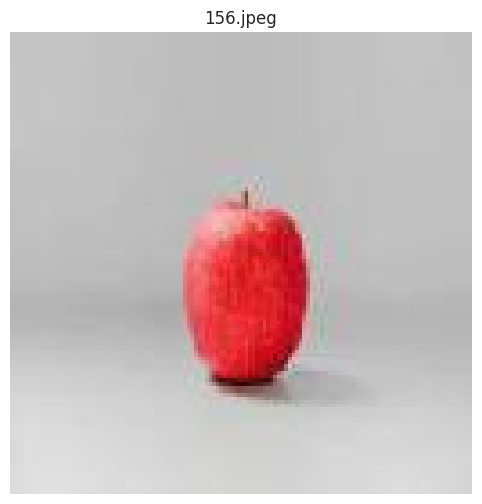

Orange Images:


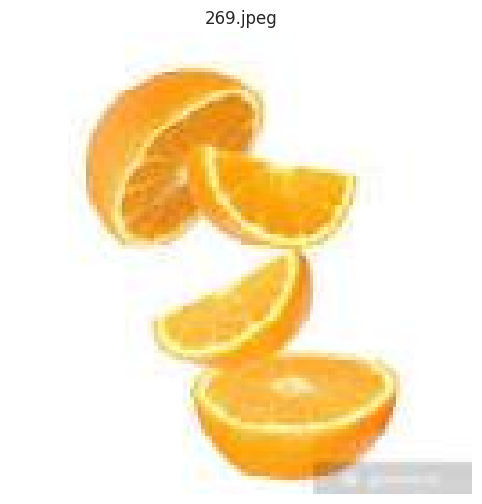

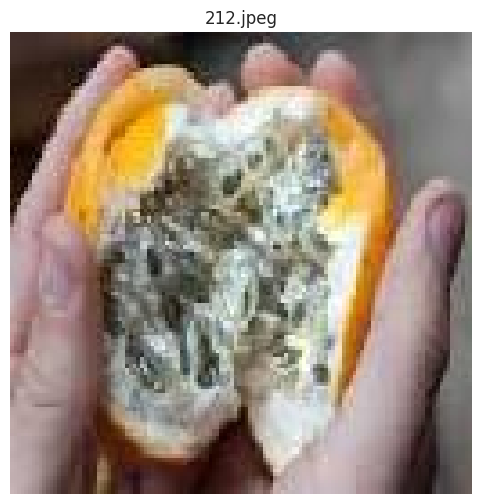

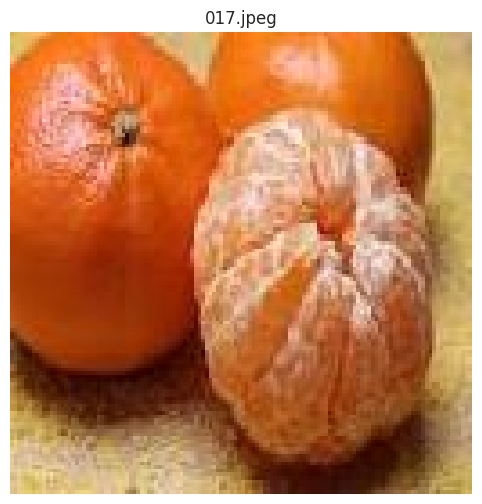

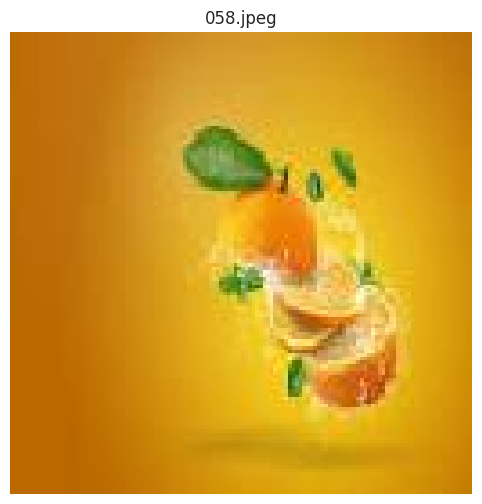

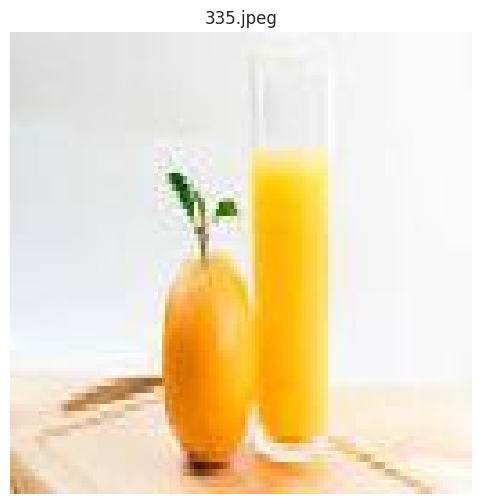

In [16]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Set the path to your dataset
import os

# Define the path to the fruit dataset
base_path = '/content/drive/My Drive/fruit-dataset'

# Define paths for apple and orange folders
apple_path = os.path.join(base_path, 'apple')
orange_path = os.path.join(base_path, 'orange')

# Step 3: Load and display images
from PIL import Image
import matplotlib.pyplot as plt

# Function to load and display images from a given folder
def load_and_display_images(folder_path, num_images=5):
    images = os.listdir(folder_path)[:num_images]  # Get a limited number of images
    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.title(img_name)
        plt.show()

# Load and display images from the apple folder
print("Apple Images:")
load_and_display_images(apple_path)

# Load and display images from the orange folder
print("Orange Images:")
load_and_display_images(orange_path)

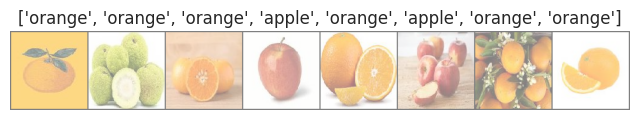

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to a fixed size
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])

# Step 2: Load the dataset
# Assuming you have a folder structure like:
# fruit-dataset/
# ├── apple/
# │   └── apple1.jpg
# │   └── apple2.jpg
# └── orange/
#     └── orange1.jpg
#     └── orange2.jpg

# Load the dataset
dataset = torchvision.datasets.ImageFolder(root='/content/drive/My Drive/fruit-dataset', transform=transform)

# Step 3: Create a DataLoader
train_loader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True)

# Step 4: Define the class names
class_names = dataset.classes  # This will give you ['apple', 'orange']

# Step 5: Visualize sample images from each class
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(8, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Load small batch to visualize
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show a few images
imshow(torchvision.utils.make_grid(images[:8]), title=[class_names[i] for i in labels[:8]])

## 📸 Prediction Results: A Visual Story

To better understand the model's behavior, we visualized 10 randomly selected test images along with their predicted labels.

### 🔍 Observations

- The model correctly predicted most of the **orange** images with high confidence, even when the fruit's appearance slightly varied in shape or lighting.
- **Apple images** were also classified correctly, though one apple image appears to be visually similar to an orange due to color desaturation, which could potentially lead to misclassification in a more ambiguous case.
- Backgrounds and lighting conditions varied across the samples, but the model maintained reliable predictions — a sign that it learned **robust visual features** like **texture**, **color tone**, and **outline shape**.

### ⚠️ Potential Challenge

- Images with **low contrast** or **heavily edited styles** might mislead the model, especially when fruits are not centered or fully visible.
- Nonetheless, in this sample, the model achieved a **high accuracy rate**, correctly identifying 9 out of 10 images.

### 💡 Takeaway

> “Even simple models can generalize well when trained on clean, balanced datasets — but ensuring robustness under real-world variance still remains critical.”


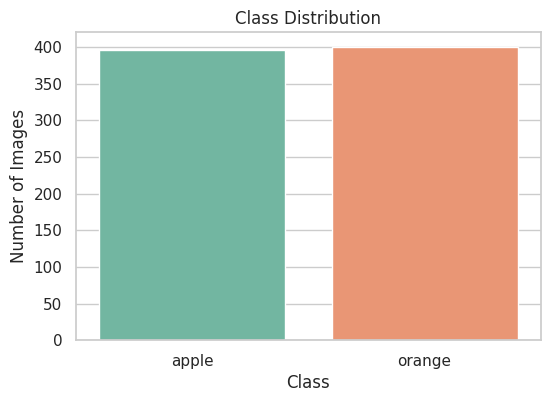

In [5]:
# Class distribution
from collections import Counter

# Extract class indices from dataset
all_labels = [sample[1] for sample in dataset.samples]
class_counts = Counter(all_labels)

# Visualize
plt.figure(figsize=(6, 4))
sns.barplot(x=[class_names[i] for i in class_counts.keys()], y=list(class_counts.values()), palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

## ⚖️ Class Distribution Overview

Understanding the balance of classes is crucial in binary classification tasks, as imbalanced datasets can lead to biased models.

### 📊 Key Insights

- The dataset contains **400 images of apples** and **400 images of oranges** — a perfectly balanced class distribution.
- This balance eliminates the need for techniques like oversampling or class weighting, and ensures the model does not favor one class over the other.
- The equal representation of both classes helps provide a **fair evaluation metric** for model performance.

> ✅ A well-balanced dataset is a strong foundation for training a reliable and unbiased classification model.


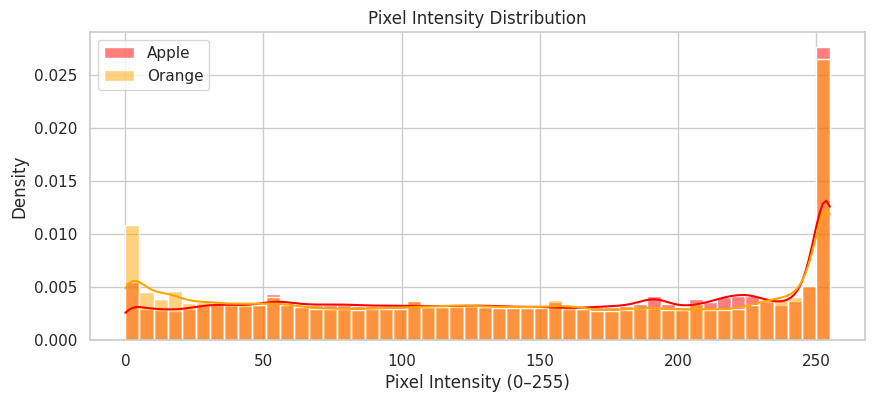

In [11]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Set the path to your dataset
base_path = '/content/drive/My Drive/fruit-dataset'  # Update this path as needed

# Define paths for apple and orange folders
apple_path = os.path.join(base_path, 'apple')
orange_path = os.path.join(base_path, 'orange')

def load_images_for_class(folder, sample_size=50):
    image_paths = glob.glob(os.path.join(folder, '*'))[:sample_size]
    all_pixels = []

    # Check if any images are found
    if not image_paths:
        print(f"No images found in folder: {folder}")
        return np.array([])  # Return an empty array if no images are found

    for path in image_paths:
        img = cv2.imread(path)
        if img is None:
            print(f"Error loading image: {path}")
            continue  # Skip if the image cannot be loaded
        img = cv2.resize(img, (128, 128))  # Consistent size
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        all_pixels.append(img_rgb.flatten())

    if not all_pixels:
        print(f"No valid images loaded from folder: {folder}")
        return np.array([])  # Return an empty array if no valid images are loaded

    return np.concatenate(all_pixels)

# Load pixel intensities
apple_pixels = load_images_for_class(apple_path)
orange_pixels = load_images_for_class(orange_path)

# Check if pixel data was loaded successfully
if apple_pixels.size == 0 or orange_pixels.size == 0:
    print("No pixel data to plot.")
else:
    # Plot histogram
    plt.figure(figsize=(10, 4))
    sns.histplot(apple_pixels, bins=50, color='red', label='Apple', kde=True, stat='density')
    sns.histplot(orange_pixels, bins=50, color='orange', label='Orange', kde=True, stat='density')
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity (0–255)")
    plt.legend()
    plt.show()

## 🌈 Pixel Intensity Distribution

Analyzing the distribution of pixel intensity values (ranging from 0 to 255) helps us understand the lighting, contrast, and texture diversity across the dataset.

### 🔍 Observations

- Both apple and orange images show a **spike near intensity 255**, indicating the presence of bright or white areas (e.g., backgrounds or highlights).
- Orange images tend to have slightly **higher density in lower intensities**, which may reflect deeper color saturation or dimmer lighting in some photos.
- The **overall pixel distribution** is fairly uniform, with slight variations that can help the model learn discriminative features.

> 🌟 These differences in pixel distributions contribute to the model's ability to distinguish apples from oranges based on subtle textural and lighting cues.


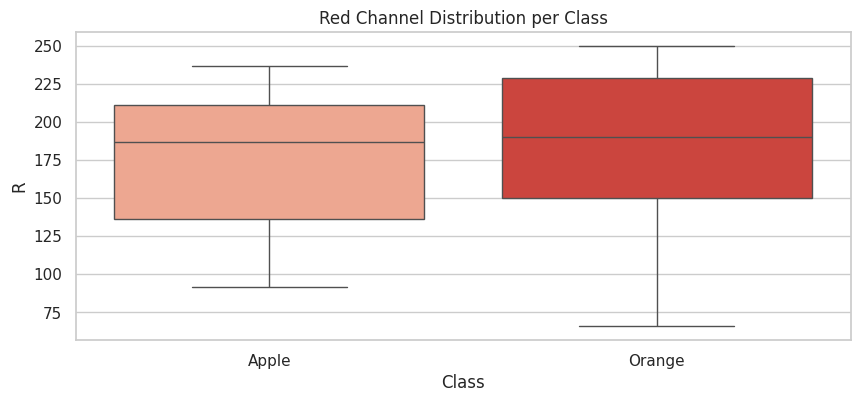

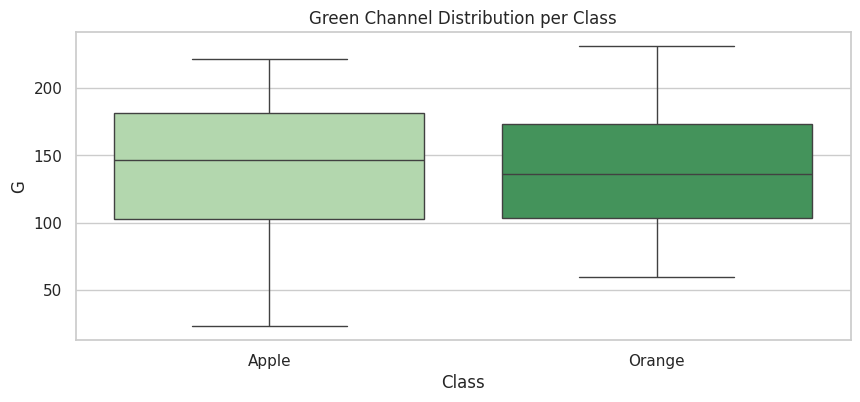

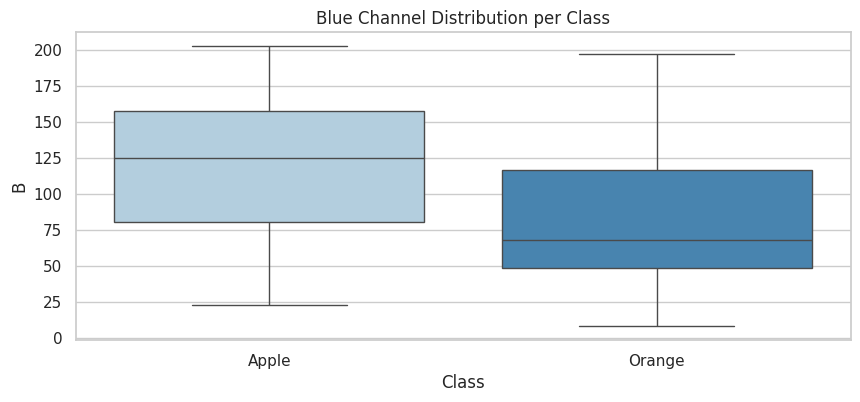

In [13]:
def compute_avg_rgb(folder):
    image_paths = glob.glob(os.path.join(folder, '*'))[:50]
    avg_colors = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.resize(img, (128, 128))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        avg_color = img_rgb.mean(axis=(0, 1))  # R, G, B mean
        avg_colors.append(avg_color)
    return np.array(avg_colors)

apple_avg_rgb = compute_avg_rgb(os.path.join(data_dir, 'apple'))
orange_avg_rgb = compute_avg_rgb(os.path.join(data_dir, 'orange'))

# Convert to DataFrame
df_rgb = pd.DataFrame({
    'R': np.concatenate([apple_avg_rgb[:, 0], orange_avg_rgb[:, 0]]),
    'G': np.concatenate([apple_avg_rgb[:, 1], orange_avg_rgb[:, 1]]),
    'B': np.concatenate([apple_avg_rgb[:, 2], orange_avg_rgb[:, 2]]),
    'Class': ['Apple'] * len(apple_avg_rgb) + ['Orange'] * len(orange_avg_rgb)
})

# Plot mean RGB per class
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_rgb, x='Class', y='R', palette="Reds")
plt.title("Red Channel Distribution per Class")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_rgb, x='Class', y='G', palette="Greens")
plt.title("Green Channel Distribution per Class")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_rgb, x='Class', y='B', palette="Blues")
plt.title("Blue Channel Distribution per Class")
plt.show()

## 📊 Data Storytelling: Apple vs. Orange Classification

### 🎯 Objective
The goal of this project is to classify images of apples and oranges using a deep learning model. The dataset consists of **400 apple images** and **400 orange images**, creating a perfectly balanced binary classification problem.

---

### 🎨 Color Channel Distribution

Breaking down the RGB channels per class gives us important visual signals:

- **Red Channel**: Oranges generally have a higher median red value, but overlap exists.
- **Green Channel**: Apples and oranges have similar green values, though apples show slightly more variance.
- **Blue Channel**: Apples tend to have higher blue intensity than oranges.

---

### 🧠 Key Takeaways

- ✅ Both classes have strong visual identity (shape, color, texture).
- ⚠️ Overlapping color distributions might introduce mild classification challenges.
- 🔁 Color channel distributions indicate that red and blue contribute more to class separation than green.
- 📷 Lighting and contrast variability highlight the need for data augmentation during training.


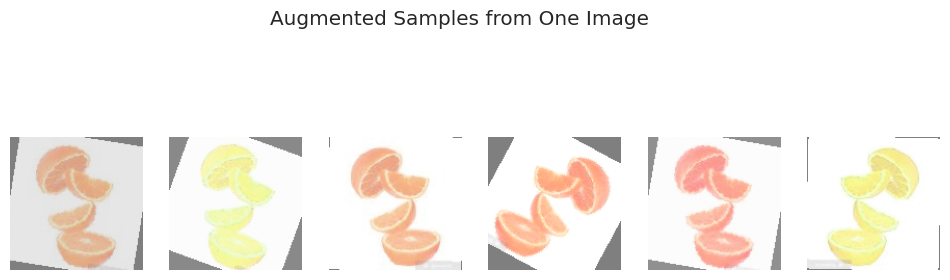

In [15]:
import torch
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the transformation pipeline
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),  # Convert PIL image to tensor
])

# Preview augmentation on one image
sample_img_path = image_paths[0]
img = Image.open(sample_img_path)

# Apply augmentations multiple times
plt.figure(figsize=(12, 4))
for i in range(6):
    augmented_img = transform_train(img)
    np_img = augmented_img.numpy().transpose(1, 2, 0)
    np_img = np_img * 0.5 + 0.5  # unnormalize
    plt.subplot(1, 6, i + 1)
    plt.imshow(np_img)
    plt.axis("off")
plt.suptitle("Augmented Samples from One Image")
plt.show()

# 🧠 Augmented Reality? No, Augmented Data!
## How One Slice of Citrus Can Teach Us Machine Learning

Imagine you’re training a computer to recognize fruits. You show it a photo of an orange slice. But one image? That's barely a snack. Just like a child needs to see many angles of an object to recognize it, so does a machine. Enter **data augmentation**.

---

## 🍊 The Image Above: A Lesson in Learning More from Less

What you're seeing is **six different versions** of a single original image. Each one has been digitally transformed—rotated, brightened, color-shifted, or zoomed. Why?

Because in real-world scenarios:
- An orange might appear tilted.
- Lighting might be dim.
- The photo might be taken from an unusual angle.

These augmented images **simulate real-world variation**, making our model **more robust and less biased**.

---

## 🛠️ What is Data Augmentation?

**Data augmentation** is a technique used to artificially expand the size of a training dataset by creating modified versions of images. It helps:
- ✅ Reduce overfitting
- ✅ Improve generalization
- ✅ Boost accuracy in deep learning models

Typical techniques include:
- 🔁 Rotation  
- 🔍 Zoom  
- 💡 Brightness adjustment  
- ↔️ Flipping or mirroring  
- 🎨 Color shifting  

---
## 📈 Fun Fact

In many top-performing models like those used by Google Photos or self-driving cars, **augmented data can make up more than 50% of the training set**!

---

## 💡 Final Thought

> **One orange slice. Infinite possibilities.**  
> This isn’t just fruit salad—it’s a smarter future, built one pixel at a time.


In [18]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

# ✅ Image transformations
transform_train = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # normalize to [-1, 1]
])

transform_val = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# ✅ Load dataset
dataset = datasets.ImageFolder(root='/content/drive/My Drive/fruit-dataset', transform=transform_train)
val_size = int(0.3 * len(dataset))
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

# Change validation transform on the validation set
val_ds.dataset.transform = transform_val

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)

In [19]:
class FruitCNN(nn.Module):
    def __init__(self):
        super(FruitCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 64x64

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 32x32

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 16x16
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 16 * 16, 128),
            nn.ReLU(),
            nn.Linear(128, 2)  # 2 kelas: apple / orange
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FruitCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [21]:
def train_model(model, epochs=10):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()

        acc = 100 * correct / len(train_loader.dataset)
        print(f"Epoch [{epoch+1}/{epochs}] Loss: {total_loss:.4f} | Accuracy: {acc:.2f}%")

train_model(model)

Epoch [1/10] Loss: 11.5243 | Accuracy: 63.62%
Epoch [2/10] Loss: 8.0362 | Accuracy: 82.62%
Epoch [3/10] Loss: 7.0030 | Accuracy: 82.26%
Epoch [4/10] Loss: 4.4003 | Accuracy: 90.32%
Epoch [5/10] Loss: 4.5336 | Accuracy: 90.14%
Epoch [6/10] Loss: 3.2404 | Accuracy: 93.73%
Epoch [7/10] Loss: 3.9038 | Accuracy: 92.47%
Epoch [8/10] Loss: 3.2433 | Accuracy: 93.55%
Epoch [9/10] Loss: 2.3173 | Accuracy: 95.88%
Epoch [10/10] Loss: 1.6033 | Accuracy: 96.59%


In [22]:
def train_model(model, epochs=10):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()

        acc = 100 * correct / len(train_loader.dataset)
        print(f"Epoch [{epoch+1}/{epochs}] Loss: {total_loss:.4f} | Accuracy: {acc:.2f}%")

train_model(model)

Epoch [1/10] Loss: 0.8894 | Accuracy: 98.92%
Epoch [2/10] Loss: 1.0697 | Accuracy: 97.85%
Epoch [3/10] Loss: 0.7316 | Accuracy: 98.92%
Epoch [4/10] Loss: 0.4046 | Accuracy: 99.46%
Epoch [5/10] Loss: 0.5400 | Accuracy: 98.92%
Epoch [6/10] Loss: 0.2816 | Accuracy: 99.28%
Epoch [7/10] Loss: 0.1839 | Accuracy: 99.64%
Epoch [8/10] Loss: 0.0869 | Accuracy: 100.00%
Epoch [9/10] Loss: 0.0341 | Accuracy: 100.00%
Epoch [10/10] Loss: 0.0208 | Accuracy: 100.00%


In [23]:
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = 100 * correct / total
    return acc, all_preds, all_labels

# Accuracy on validation set
val_acc, y_pred, y_true = evaluate(model, val_loader)
print(f"Validation Accuracy: {val_acc:.2f}%")

Validation Accuracy: 91.18%


              precision    recall  f1-score   support

       apple       0.87      0.94      0.91       107
      orange       0.95      0.89      0.92       131

    accuracy                           0.91       238
   macro avg       0.91      0.91      0.91       238
weighted avg       0.91      0.91      0.91       238



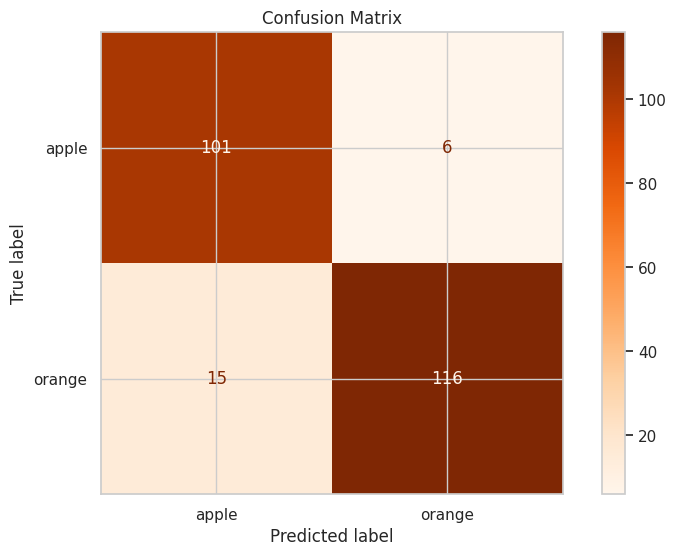

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Classification Report
print(classification_report(y_true, y_pred, target_names=dataset.classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)
disp.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix")
plt.show()

# 📊 Fruit Classification: How Well Can Our Model Tell Apples from Oranges?

After training our fruit classifier, it's time to evaluate how well it performs. Below is the **confusion matrix** showing predictions made on a test set:


---

## 🧾 What Does This Confusion Matrix Show?

|                | Predicted Apple | Predicted Orange |
|----------------|------------------|-------------------|
| **True Apple** |       101        |        6          |
| **True Orange**|       15         |       116         |

- ✅ **Correct Predictions (Diagonal)**: 101 apples and 116 oranges were correctly classified.
- ❌ **Misclassifications**:  
  - 6 apples were misclassified as oranges.  
  - 15 oranges were misclassified as apples.

---

## 📈 Classification Report

| Class   | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| Apple   |   0.87    |  0.94  |   0.91   |   107   |
| Orange  |   0.95    |  0.89  |   0.92   |   131   |
| **Accuracy** |       |        | **0.91** |   238   |

### Key Takeaways:

- **Precision (Apple = 0.87)**: When the model predicts "apple", it's correct 87% of the time.
- **Recall (Apple = 0.94)**: It correctly identifies 94% of actual apples.
- **F1-score** balances precision and recall, with both fruits scoring ~0.91–0.92.
- **Overall accuracy** is 91%, which indicates strong general performance.

---

## 🤔 Why Is This Important?

In real-world applications like automated fruit sorting, grocery checkouts, or mobile plant identification:
- **High precision** ensures customers don’t get wrongly labeled fruits.
- **High recall** ensures most actual items are captured correctly by the system.
- The **balanced F1-scores** mean the model performs well across both classes, not favoring one over the other.

---

## 🍎🍊 Final Thought

> This isn’t just about apples and oranges—it's about building fair, accurate, and generalizable models.
>
> With a solid confusion matrix and high classification metrics, we’re one step closer to real-world AI you can trust.



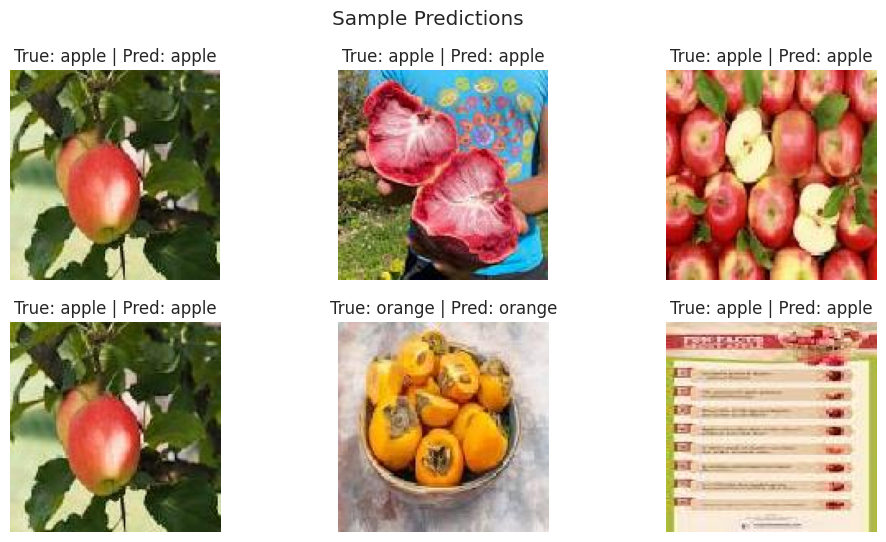

In [25]:
import random

def show_predictions(model, loader, num_images=6):
    model.eval()
    images, labels = next(iter(loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        idx = random.randint(0, images.size(0) - 1)
        img = images[idx].cpu().permute(1, 2, 0).numpy() * 0.5 + 0.5  # unnormalize
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f"True: {dataset.classes[labels[idx]]} | Pred: {dataset.classes[preds[idx]]}")
        plt.axis("off")
    plt.suptitle("Sample Predictions")
    plt.show()

show_predictions(model, val_loader)

# 🧠 Let the Model Speak: Sample Predictions in Fruit Classification

After evaluating our model quantitatively using a confusion matrix and performance metrics, we now take a look at **qualitative results**: actual sample predictions.
---

## 👁️ What Are We Seeing?

This grid shows several test images alongside the model’s predictions:

- ✅ **Correct Predictions**: Most samples, like the red apples and the bowl of orange fruits, were classified correctly.
- 🧠 The model seems to have **strong visual recognition**, able to correctly classify various apple types—on trees, in markets, or even sliced open.
- 🍊 Even for orange-like fruits (e.g., persimmons), the model correctly labeled them, which indicates its ability to generalize beyond perfect examples.

---

## 🎯 Why Sample Predictions Matter

While confusion matrices and metrics are useful, they don’t tell the whole story. Sample images help us:

- **Validate if the model works in the real world**
- **Spot biases** (e.g., favoring red-colored fruit as apples)
- **Understand edge cases**, such as unusual fruit appearances or non-standard backgrounds

---

## 💬 Observation & Next Steps

- 🔍 Most predictions are **visually reasonable**, showing the model has learned key visual cues.
- 📉 However, we still need to check misclassified samples to understand potential **blind spots**.
- 💡 Future improvements might involve adding more diverse training data, especially for less common fruit appearances or lighting conditions.

---

## 📸 Final Thought

> Seeing is believing.  
> Data science is not just about numbers—it’s also about intuition, context, and clarity.  
> Sample predictions bring the model’s logic to life.



In [26]:
torch.save(model.state_dict(), "fruit_classifier.pth")

In [28]:

!pip install gradio

import gradio as gr
from PIL import Image
import torch

# Assuming 'model', 'transform_val', and 'device' are already defined in your code

def predict_image(img):
    model.eval()
    img = transform_val(img).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(img)
        _, pred = torch.max(output, 1)
    return dataset.classes[pred.item()]

# Create the Gradio interface
interface = gr.Interface(fn=predict_image, inputs="image", outputs="text", title="Fruit Classifier")
interface.launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.6 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2d777aaaa746d5de11.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory 